# Graham scan algorithm

In [8]:
import math

class Stack:
    def __init__(self):
        self.__stack = []
    
    def push(self, x):
        self.__stack.append(x)

    def pop(self):
        if not self.size() == 0:
            x = self.__stack[-1]
            self.__stack = self.__stack[:-1:]
            return x
        else:
            return
        
    def size(self):
        return len(self.__stack)

    def peek2(self):
        return self.__stack[-2] if self.size() > 2 else None

    def peek(self):
        return self.__stack[-1] if self.size() > 1 else None
    
    def getStack(self):
        return self.__stack

def ccw(p1, p2, p3):
    if p1 == None or p2 == None or p3 == None:
        return 0
    p1, p2, p3 = cartesian(p1), cartesian(p2), cartesian(p3)
    return (p2[0]-p1[0])*(p3[1]-p1[1])-(p2[1]-p1[1])*(p3[0]-p1[0])

def centroid(triangle):
    # Reference to https://www.mathopenref.com/coordcentroid.html 
    return [sum([i[0] for i in triangle]) / len(triangle), sum([i[1] for i in triangle]) / len(triangle)]

def pyth(p1, p2):
    # Calculates the distance between two points in the R^2 vector space using Pythagorous' 
    return sum([(p1[i] - p2[i]) ** 2 for i in range(len(p1))]) ** 0.5

def changerange(theta):
    # The paper used the range of radians to be between [0, 2pi), but the math library uses [-pi, pi) 
    return theta if theta >= 0 else math.tau + theta

def midtest(points):
    # Finds the midpoint between 3 collinear points, returns two points which has the longest distance 
    distances = [pyth(points[0], points[1]), pyth(points[0], points[2]), pyth(points[1], points[2])]
    if max(distances) == distances[0]:
        return [points[0], points[1]]
    return [points[0], points[2]] if max(distances) == distances[1] else [points[1], points[2]]

def calcP(inputSet):
    # Finds the point P 
    while ccw(inputSet[0], inputSet[1], inputSet[2]) == 0 and len(inputSet) > 3:
        inputSet = midtest(inputSet[:3:]) + inputSet[3::]
    return centroid(inputSet[:3:])

def polar(coordinates):
    return [pyth(coordinates, [0,0]), changerange(math.atan2(coordinates[1], coordinates[0]))]

def cartesianList(polarHull, P):
    return [cartesian(i, P=P) for i in polarHull]

def resetOrigin(P, inputSet):
    return [polar([i[0]-P[0], i[1]-P[1]]) for i in inputSet]

def cartesian(coordinates, P=[0,0]):
    return [round((coordinates[0] * math.cos(coordinates[1])) + P[0]), round((coordinates[0] * math.sin(coordinates[1])) + P[1])]

def merge(L,R):
    ret_array = []
    l_index, r_index = 0, 0
    while len(ret_array) < (len(L) + len(R)):
        if l_index == len(L):
            ret_array += R[r_index:]
            break
        elif r_index == len(R):
            ret_array += L[l_index:]
            break
        if L[l_index][1] < R[r_index][1]:
            ret_array.append(L[l_index])
            l_index += 1
        elif L[l_index][1] >= R[r_index][1]:
            ret_array.append(R[r_index])
            r_index += 1
    return ret_array

def msort(inputSet):
    # Sort the set of coordinates using merge sort
    return inputSet if len(inputSet) == 1 else merge(msort(inputSet[:len(inputSet)//2:]), msort(inputSet[len(inputSet)//2::]))

def maxr(inputSet, threshold=1e-8):
    # This function selects the polar coordinate with same angle as others but has the largest magnitude
    # A threshold default argument has been added to prevent floating point arithmetic errors
    polar, curtheta = [], -math.inf
    for i in inputSet:
        if abs(i[1] - curtheta) < threshold:
            polar[-1][0] = max(i[0], polar[-1][0])
        else:
            polar.append(i)
            curtheta = i[1]
    return polar

def deletenomag(inputSet):
    # This function removes the polar coordinates with no magnitude
    return [i for i in inputSet if i[0] != 0]

def trace(inputSet):
    stack = Stack()
    inputSet = inputSet + [inputSet[0], inputSet[1]]
    for point in inputSet:
        while stack.size() > 1 and ccw(stack.peek2(), stack.peek(), point) < 0:
            _ = stack.pop()
        stack.push(point)
    return stack.getStack()

def grahamscan(inputSet):
    P = calcP(inputSet)
    polarSet = maxr(msort(deletenomag(resetOrigin(P, inputSet))))
    polarHull = trace(polarSet)
    return cartesianList(polarHull, P)

Use the cell below for all python code needed to generate test data points (both random and those representing worst-case scenario).

In [9]:
import random

#code for random data generation
def randGeneration(n, lb=0, ub=32767):
    return [[random.randint(lb, ub), random.randint(lb, ub)] for i in range(n)]

#code for worst case data generation
def randWorstGeneration(n):
    return [[0,0] for i in range(n)]

Use the cell below for all python code needed to test the `grahamscan()` function on the data generated above.

In [ ]:
import timeit

#test code
def test(n, worstCase=False, repeats=1):
    timetaken = [0 for i in range(len(n))]
    for j in range(repeats):
        for i in n:
            data = randWorstGeneration(int(i)) if worstCase else randGeneration(int(i))
            start_time = timeit.default_timer()
            _ = grahamscan(data)
            timetaken[n.index(i)] += timeit.default_timer() - start_time
    return [i/repeats for i in timetaken]

r_timetaken, w_timetaken = test(n, repeats=5), test(n, worstCase = True)

In [ ]:
import matplotlib.pyplot as plt
print (r_timetaken)
plt.plot(n, r_timetaken)
plt.show()

*Optional*: Feel free to use the code below on small datasets (e.g., N = 10) to visually inspect whether the algorithm has been implemented correctly. The fragment below assumes both `inputSet` and `outputSet` to be lists of 2D points, with each point being a list of 2 elements (e.g., `[[x1,y1], [x2,y2], ..., [x_k,y_k]]`)

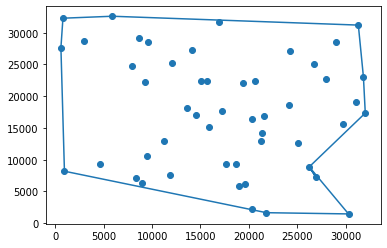

In [19]:
import matplotlib.pyplot as plt

#inputSet = [[1,1], [2,2], [3,3], [4,4], [1,4], [3,1], [1,5], [2,4], [3,5]]
#outputSet = [[1,1], [3,1], [4,4], [3,5], [1,5]]

inputSet = randGeneration(50)
outputSet = grahamscan(inputSet)

plt.figure()

#first do a scatter plot of the inputSet
input_xs, input_ys = zip(*inputSet)
plt.scatter(input_xs, input_ys)

#then do a polygon plot of the computed covex hull
outputSet.append(outputSet[0]) #first create a 'closed loop' by adding the first point at the end of the list
output_xs, output_ys = zip(*outputSet)
plt.plot(output_xs, output_ys) 

plt.show() 